In [3]:
import sys
import os
import subprocess

app_base_dir = '/home/spbproc/euso-spb-patt-reco-v1'
if app_base_dir not in sys.path:
    sys.path.append(app_base_dir)

import re
# import collections
import numpy as np
import psycopg2 as pg
import pandas as pd
import pandas.io.sql as psql
import getpass
import matplotlib as mpl
import argparse
import glob
# from tqdm import tqdm
import traceback
import hashlib

from utility_funtions import str2bool_argparse

mpl.rcParams['figure.dpi'] = 80

import matplotlib.pyplot as plt

#import ROOT

# import tool.npy_frames_visualization as npy_vis
import tool.acqconv
from data_analysis_utils import *
from event_recognition_efficiency_v3 import *
# import supervised_classification as supc

/home/vrabel/EUSO-Balloon/vrabel/venv/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


Welcome to JupyROOT 6.13/02


In [4]:
con = con = pg.connect(dbname='eusospb_data', user='eusospb', host='localhost', password='1e20eVjemeuso')
cur = con.cursor()

In [5]:
simu_signals_all_query = '''
SELECT 
    spb_processing_v3_simu_signal.event.*,

    proc1_x_y_hough_peak_thr1.major_line_phi AS proc1_x_y_hough_peak_thr1_major_line_phi, 
    proc1_gtu_x_hough_peak_thr1.major_line_phi AS proc1_gtu_x_hough_peak_thr1_major_line_phi, 
    proc1_gtu_y_hough_peak_thr1.major_line_phi AS proc1_gtu_y_hough_peak_thr1_major_line_phi,

    proc1_x_y_hough_peak_thr1.major_line_rho AS proc1_x_y_hough_peak_thr1_major_line_rho, 
    proc1_gtu_x_hough_peak_thr1.major_line_rho AS proc1_gtu_x_hough_peak_thr1_major_line_rho, 
    proc1_gtu_y_hough_peak_thr1.major_line_rho AS proc1_gtu_y_hough_peak_thr1_major_line_rho,
    
    proc1_x_y_hough_peak_thr2.major_line_phi AS proc1_x_y_hough_peak_thr2_major_line_phi, 
    proc1_gtu_x_hough_peak_thr2.major_line_phi AS proc1_gtu_x_hough_peak_thr2_major_line_phi, 
    proc1_gtu_y_hough_peak_thr2.major_line_phi AS proc1_gtu_y_hough_peak_thr2_major_line_phi,

    proc1_x_y_hough_peak_thr2.major_line_rho AS proc1_x_y_hough_peak_thr2_major_line_rho, 
    proc1_gtu_x_hough_peak_thr2.major_line_rho AS proc1_gtu_x_hough_peak_thr2_major_line_rho, 
    proc1_gtu_y_hough_peak_thr2.major_line_rho AS proc1_gtu_y_hough_peak_thr2_major_line_rho,
    
    proc1_x_y_hough_peak_thr3.major_line_phi AS proc1_x_y_hough_peak_thr3_major_line_phi, 
    proc1_gtu_x_hough_peak_thr3.major_line_phi AS proc1_gtu_x_hough_peak_thr3_major_line_phi, 
    proc1_gtu_y_hough_peak_thr3.major_line_phi AS proc1_gtu_y_hough_peak_thr3_major_line_phi,
    
    proc1_x_y_hough_peak_thr3.major_line_rho AS proc1_x_y_hough_peak_thr3_major_line_rho, 
    proc1_gtu_x_hough_peak_thr3.major_line_rho AS proc1_gtu_x_hough_peak_thr3_major_line_rho, 
    proc1_gtu_y_hough_peak_thr3.major_line_rho AS proc1_gtu_y_hough_peak_thr3_major_line_rho,
    
    proc1_x_y_hough_peak_thr1.line_clusters_max_sum_clu_width AS proc1_x_y_hough_peak_thr1_line_clusters_max_sum_clu_width,
    proc1_x_y_hough_peak_thr1.line_clusters_max_peak_clu_width AS proc1_x_y_hough_peak_thr1_line_clusters_max_peak_clu_width,
    proc1_x_y_hough_peak_thr2.line_clusters_max_sum_clu_width AS proc1_x_y_hough_peak_thr2_line_clusters_max_sum_clu_width,
    proc1_x_y_hough_peak_thr2.line_clusters_max_peak_clu_width AS proc1_x_y_hough_peak_thr2_line_clusters_max_peak_clu_width,
    proc1_x_y_hough_peak_thr3.line_clusters_max_sum_clu_width AS proc1_x_y_hough_peak_thr3_line_clusters_max_sum_clu_width,
    proc1_x_y_hough_peak_thr3.line_clusters_max_peak_clu_width AS proc1_x_y_hough_peak_thr3_line_clusters_max_peak_clu_width,
    
    proc1_gtu_x_hough_peak_thr1.line_clusters_max_sum_clu_width AS proc1_gtu_x_hough_peak_thr1_line_clusters_max_sum_clu_width,
    proc1_gtu_x_hough_peak_thr1.line_clusters_max_peak_clu_width AS proc1_gtu_x_hough_peak_thr1_line_clusters_max_peak_clu_width,
    proc1_gtu_x_hough_peak_thr2.line_clusters_max_sum_clu_width AS proc1_gtu_x_hough_peak_thr2_line_clusters_max_sum_clu_width,
    proc1_gtu_x_hough_peak_thr2.line_clusters_max_peak_clu_width AS proc1_gtu_x_hough_peak_thr2_line_clusters_max_peak_clu_width,
    proc1_gtu_x_hough_peak_thr3.line_clusters_max_sum_clu_width AS proc1_gtu_x_hough_peak_thr3_line_clusters_max_sum_clu_width,
    proc1_gtu_x_hough_peak_thr3.line_clusters_max_peak_clu_width AS proc1_gtu_x_hough_peak_thr3_line_clusters_max_peak_clu_width,
    
    proc1_gtu_y_hough_peak_thr1.line_clusters_max_sum_clu_width AS proc1_gtu_y_hough_peak_thr1_line_clusters_max_sum_clu_width,
    proc1_gtu_y_hough_peak_thr1.line_clusters_max_peak_clu_width AS proc1_gtu_y_hough_peak_thr1_line_clusters_max_peak_clu_width,
    proc1_gtu_y_hough_peak_thr2.line_clusters_max_sum_clu_width AS proc1_gtu_y_hough_peak_thr2_line_clusters_max_sum_clu_width,
    proc1_gtu_y_hough_peak_thr2.line_clusters_max_peak_clu_width AS proc1_gtu_y_hough_peak_thr2_line_clusters_max_peak_clu_width,
    proc1_gtu_y_hough_peak_thr3.line_clusters_max_sum_clu_width AS proc1_gtu_y_hough_peak_thr3_line_clusters_max_sum_clu_width,
    proc1_gtu_y_hough_peak_thr3.line_clusters_max_peak_clu_width AS proc1_gtu_y_hough_peak_thr3_line_clusters_max_peak_clu_width,

    proc1_x_y_hough_peak_thr1.line_clusters_count AS proc1_x_y_hough_peak_thr1_line_clusters_count, 
    proc1_x_y_hough_peak_thr2.line_clusters_count AS proc1_x_y_hough_peak_thr2_line_clusters_count, 
    proc1_x_y_hough_peak_thr3.line_clusters_count AS proc1_x_y_hough_peak_thr3_line_clusters_count, 
    
    proc1_gtu_y_hough_peak_thr1.line_clusters_count AS proc1_gtu_y_hough_peak_thr1_line_clusters_count, 
    proc1_gtu_y_hough_peak_thr2.line_clusters_count AS proc1_gtu_y_hough_peak_thr2_line_clusters_count, 
    proc1_gtu_y_hough_peak_thr3.line_clusters_count AS proc1_gtu_y_hough_peak_thr3_line_clusters_count, 
    
    proc1_gtu_x_hough_peak_thr1.line_clusters_count AS proc1_gtu_x_hough_peak_thr1_line_clusters_count, 
    proc1_gtu_x_hough_peak_thr2.line_clusters_count AS proc1_gtu_x_hough_peak_thr2_line_clusters_count, 
    proc1_gtu_x_hough_peak_thr3.line_clusters_count AS proc1_gtu_x_hough_peak_thr3_line_clusters_count, 
    
    proc1_x_y_clusters.count              AS proc1_x_y_clusters_count, 
    proc1_x_y_clusters.max_sum_clu_width  AS proc1_x_y_clusters_max_sum_clu_width, 
    proc1_x_y_clusters.max_sum_clu_height AS proc1_x_y_clusters_max_sum_clu_height,
    
    proc1_gtu_y_clusters.count              AS proc1_gtu_y_clusters_count, 
    proc1_gtu_y_clusters.max_sum_clu_width  AS proc1_gtu_y_clusters_max_sum_clu_width, 
    proc1_gtu_y_clusters.max_sum_clu_height AS proc1_gtu_y_clusters_max_sum_clu_height ,
    
    proc1_gtu_x_clusters.count              AS proc1_gtu_x_clusters_count, 
    proc1_gtu_x_clusters.max_sum_clu_width  AS proc1_gtu_x_clusters_max_sum_clu_width, 
    proc1_gtu_x_clusters.max_sum_clu_height AS proc1_gtu_x_clusters_max_sum_clu_height,
    
    
 FROM spb_processing_v3_simu_signal.event 

 JOIN spb_processing_v3_simu_signal.event_proc1_x_y_hough_peak_thr1 AS proc1_x_y_hough_peak_thr1 USING(event_id)
 JOIN spb_processing_v3_simu_signal.event_proc1_gtu_y_hough_peak_thr1 AS proc1_gtu_y_hough_peak_thr1 USING(event_id)
 JOIN spb_processing_v3_simu_signal.event_proc1_gtu_x_hough_peak_thr1 AS proc1_gtu_x_hough_peak_thr1 USING(event_id)

 JOIN spb_processing_v3_simu_signal.event_proc1_x_y_hough_peak_thr2 AS proc1_x_y_hough_peak_thr2 USING(event_id)
 JOIN spb_processing_v3_simu_signal.event_proc1_gtu_y_hough_peak_thr2 AS proc1_gtu_y_hough_peak_thr2 USING(event_id)
 JOIN spb_processing_v3_simu_signal.event_proc1_gtu_x_hough_peak_thr2 AS proc1_gtu_x_hough_peak_thr2 USING(event_id)

 JOIN spb_processing_v3_simu_signal.event_proc1_x_y_hough_peak_thr3 AS proc1_x_y_hough_peak_thr3 USING(event_id)
 JOIN spb_processing_v3_simu_signal.event_proc1_gtu_y_hough_peak_thr3 AS proc1_gtu_y_hough_peak_thr3 USING(event_id)
 JOIN spb_processing_v3_simu_signal.event_proc1_gtu_x_hough_peak_thr3 AS proc1_gtu_x_hough_peak_thr3 USING(event_id)

 JOIN spb_processing_v3_simu_signal.event_proc1_x_y_clusters   AS proc1_x_y_clusters    USING (event_id)
 JOIN spb_processing_v3_simu_signal.event_proc1_gtu_x_clusters AS proc1_gtu_x_clusters  USING (event_id)
 JOIN spb_processing_v3_simu_signal.event_proc1_gtu_y_clusters AS proc1_gtu_y_clusters  USING (event_id)
   
WHERE
    source_data_type_num = 10001
    
'''
WHERE
    source_data_type_num = 10001
    
'''

In [6]:
simu_signals_all_df = psql.read_sql(simu_signals_all_query, con)

In [7]:
len(simu_signals_all_df)

75538

['proc1_x_y_hough_peak_thr1_line_clusters_max_sum_clu_width', 'proc1_x_y_hough_peak_thr2_line_clusters_max_sum_clu_width', 'proc1_x_y_hough_peak_thr3_line_clusters_max_sum_clu_width']


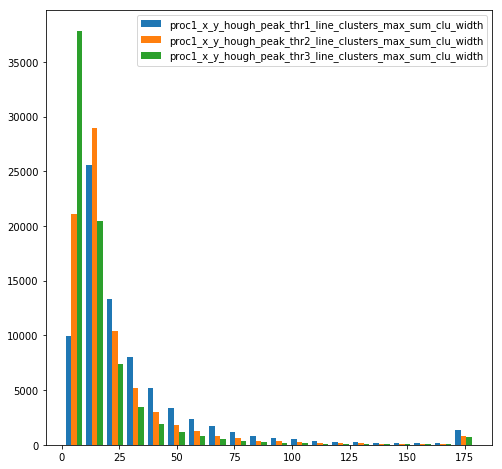

['proc1_x_y_hough_peak_thr1_line_clusters_max_peak_clu_width', 'proc1_x_y_hough_peak_thr2_line_clusters_max_peak_clu_width', 'proc1_x_y_hough_peak_thr3_line_clusters_max_peak_clu_width']


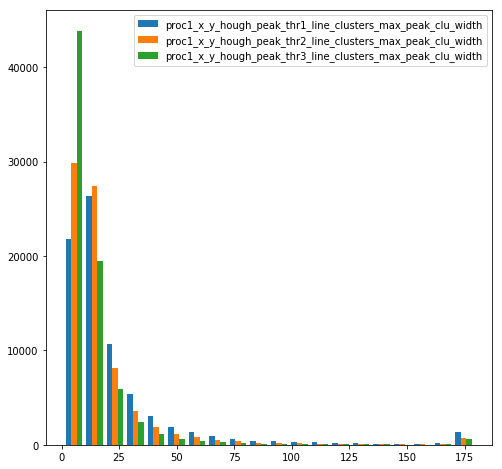

['proc1_x_y_hough_peak_thr1_line_clusters_max_sum_clu_width', 'proc1_x_y_hough_peak_thr1_line_clusters_max_peak_clu_width']


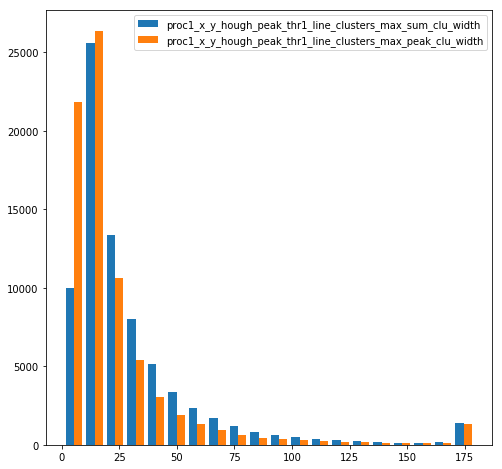

['proc1_x_y_hough_peak_thr2_line_clusters_max_sum_clu_width', 'proc1_x_y_hough_peak_thr2_line_clusters_max_peak_clu_width']


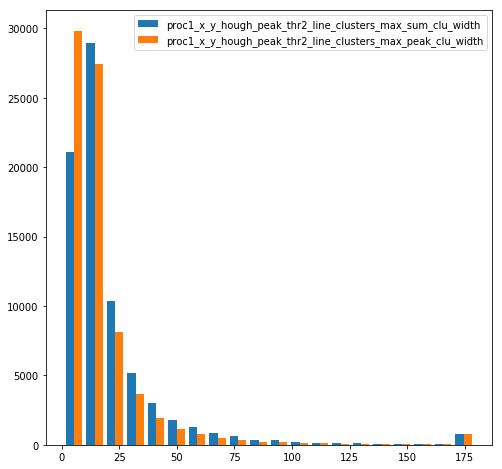

['proc1_x_y_hough_peak_thr3_line_clusters_max_sum_clu_width', 'proc1_x_y_hough_peak_thr3_line_clusters_max_peak_clu_width']


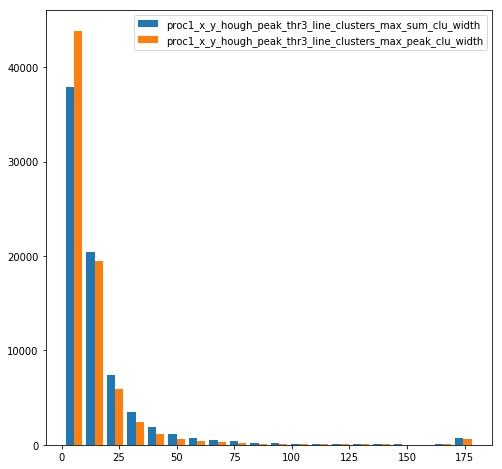

['proc1_gtu_x_hough_peak_thr1_line_clusters_max_sum_clu_width', 'proc1_gtu_x_hough_peak_thr2_line_clusters_max_sum_clu_width', 'proc1_gtu_x_hough_peak_thr3_line_clusters_max_sum_clu_width']


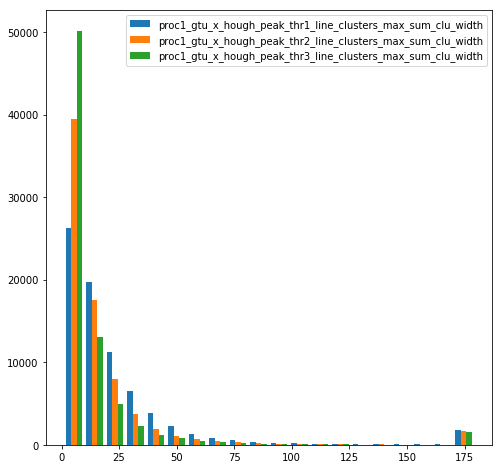

['proc1_gtu_x_hough_peak_thr1_line_clusters_max_peak_clu_width', 'proc1_gtu_x_hough_peak_thr2_line_clusters_max_peak_clu_width', 'proc1_gtu_x_hough_peak_thr3_line_clusters_max_peak_clu_width']


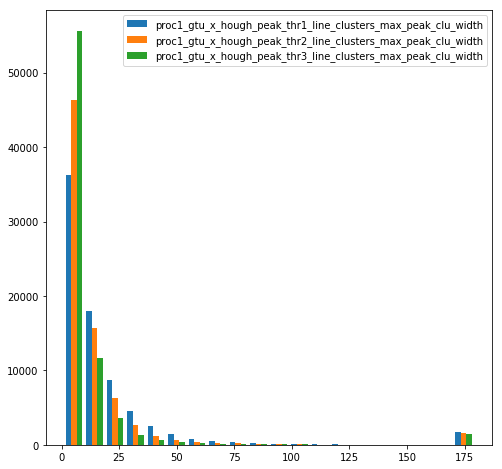

['proc1_gtu_x_hough_peak_thr1_line_clusters_max_sum_clu_width', 'proc1_gtu_x_hough_peak_thr1_line_clusters_max_peak_clu_width']


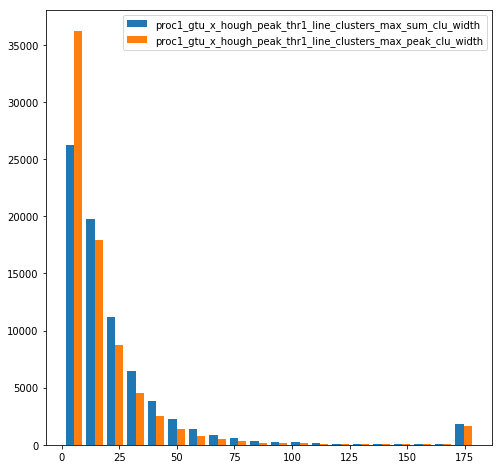

['proc1_gtu_x_hough_peak_thr2_line_clusters_max_sum_clu_width', 'proc1_gtu_x_hough_peak_thr2_line_clusters_max_peak_clu_width']


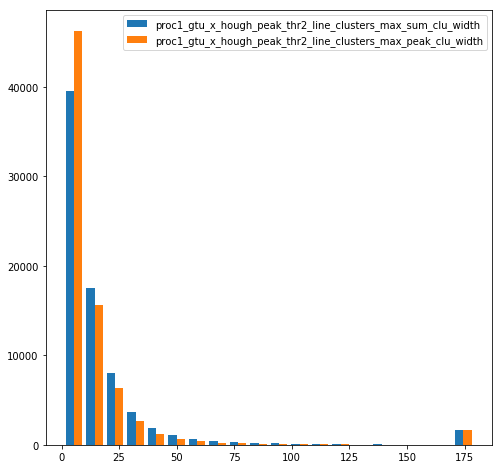

['proc1_gtu_x_hough_peak_thr3_line_clusters_max_sum_clu_width', 'proc1_gtu_x_hough_peak_thr3_line_clusters_max_peak_clu_width']


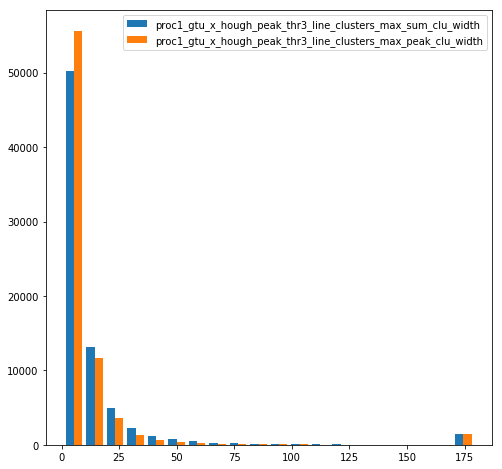

['proc1_gtu_y_hough_peak_thr1_line_clusters_max_sum_clu_width', 'proc1_gtu_y_hough_peak_thr2_line_clusters_max_sum_clu_width', 'proc1_gtu_y_hough_peak_thr3_line_clusters_max_sum_clu_width']


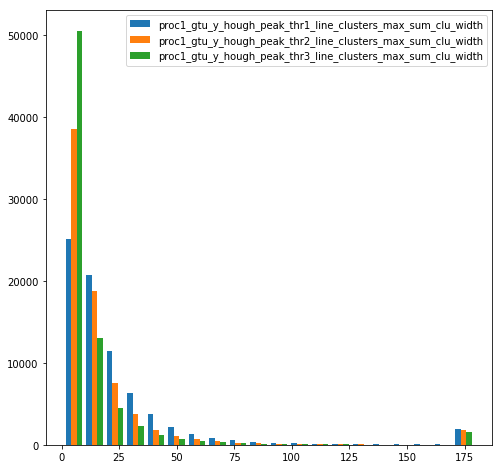

['proc1_gtu_y_hough_peak_thr1_line_clusters_max_peak_clu_width', 'proc1_gtu_y_hough_peak_thr2_line_clusters_max_peak_clu_width', 'proc1_gtu_y_hough_peak_thr3_line_clusters_max_peak_clu_width']


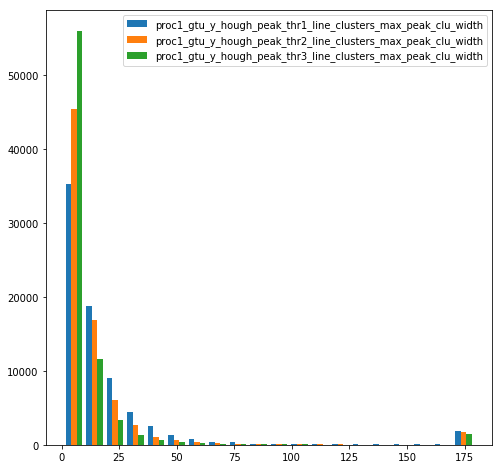

['proc1_gtu_y_hough_peak_thr1_line_clusters_max_sum_clu_width', 'proc1_gtu_y_hough_peak_thr1_line_clusters_max_peak_clu_width']


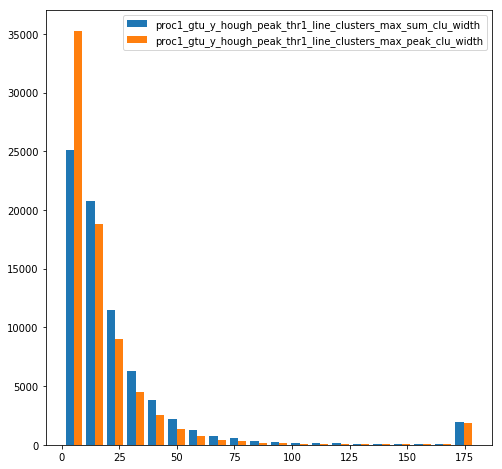

['proc1_gtu_y_hough_peak_thr2_line_clusters_max_sum_clu_width', 'proc1_gtu_y_hough_peak_thr2_line_clusters_max_peak_clu_width']


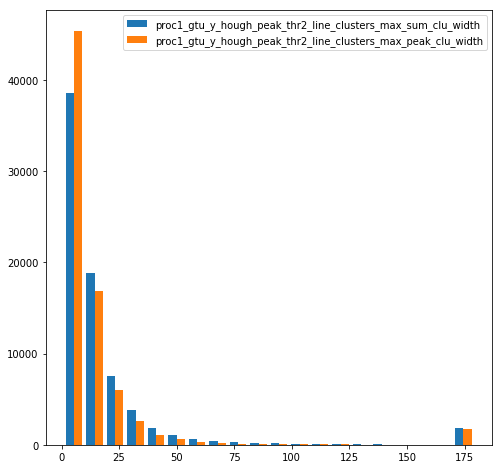

['proc1_gtu_y_hough_peak_thr3_line_clusters_max_sum_clu_width', 'proc1_gtu_y_hough_peak_thr3_line_clusters_max_peak_clu_width']


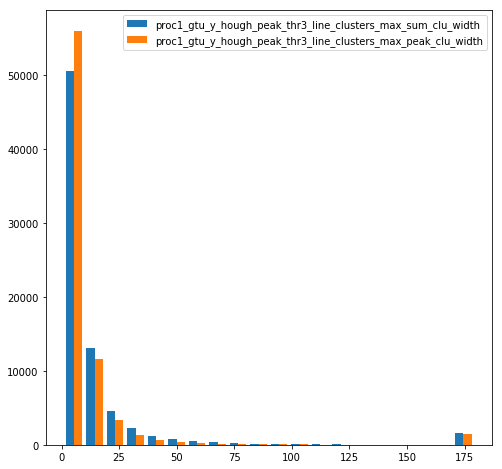

In [8]:
col_format = 'proc{proci}_{proj_type}_hough_peak_thr{thri}_line_clusters_max_{clu_type}_clu_width'

plt.close('all')

for proj_type in ['x_y','gtu_x', 'gtu_y']:
            
    for clu_type in ['sum','peak']:
        for proci in [1]:
            cmp_l = []
            for thri in [1,2,3]:
                cmp_l.append(col_format.format(proci=proci, proj_type=proj_type, thri=thri, clu_type=clu_type))
            
            print(cmp_l)
            fig,ax = plt.subplots(1)
            ax.hist(simu_signals_all_df[cmp_l].values, 20, histtype='bar', label=cmp_l) 
            ax.legend(prop={'size': 10})
            fig.set_size_inches(8,8)
            plt.show()

    for proci in [1]:
        for thri in [1,2,3]:
            cmp_l = []
            for clu_type in ['sum','peak']:
                cmp_l.append(col_format.format(proci=proci, proj_type=proj_type, thri=thri, clu_type=clu_type))
            
            print(cmp_l)
            fig,ax = plt.subplots(1)
            ax.hist(simu_signals_all_df[cmp_l].values, 20, histtype='bar', label=cmp_l) 
            ax.legend(prop={'size': 10})
            fig.set_size_inches(8,8)
            plt.show()
            

['proc1_x_y_hough_peak_thr1_line_clusters_count', 'proc1_x_y_hough_peak_thr2_line_clusters_count', 'proc1_x_y_hough_peak_thr3_line_clusters_count']


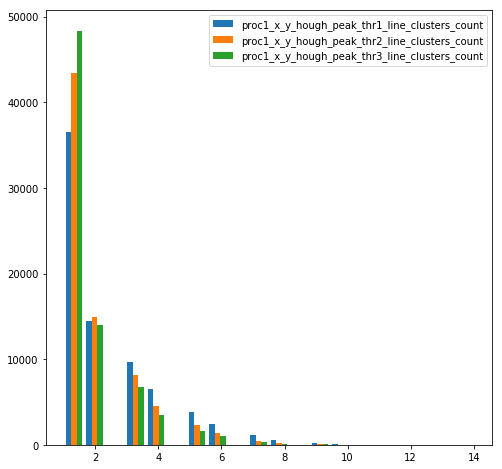

['proc1_x_y_hough_peak_thr1_line_clusters_count']


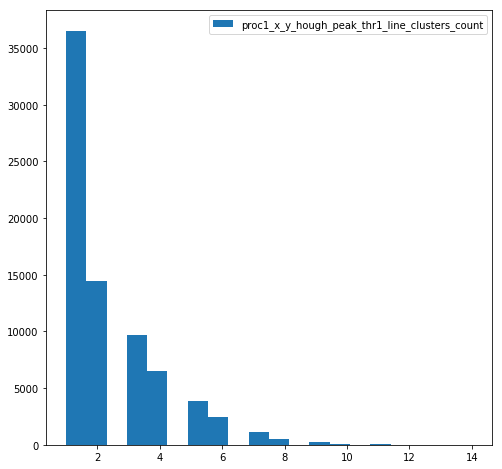

['proc1_x_y_hough_peak_thr2_line_clusters_count']


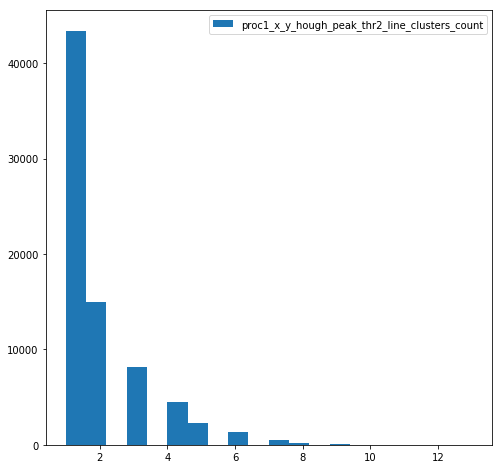

['proc1_x_y_hough_peak_thr3_line_clusters_count']


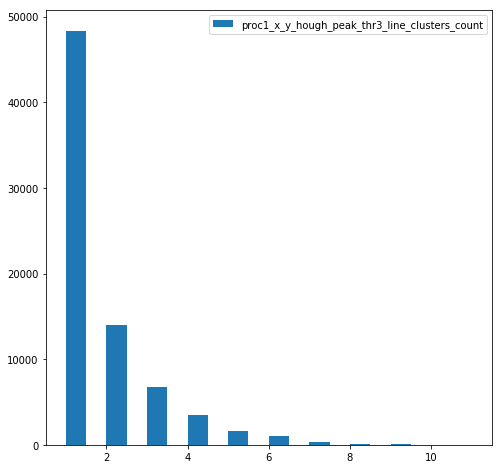

['proc1_gtu_x_hough_peak_thr1_line_clusters_count', 'proc1_gtu_x_hough_peak_thr2_line_clusters_count', 'proc1_gtu_x_hough_peak_thr3_line_clusters_count']


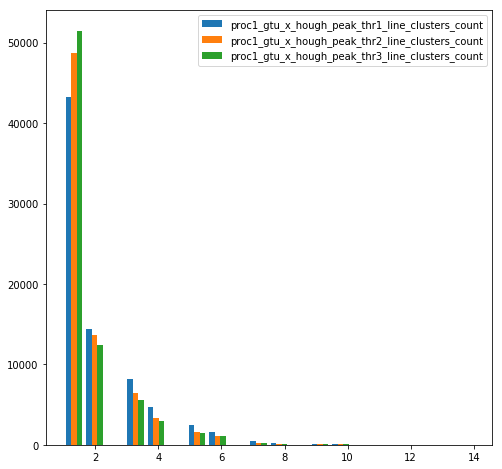

['proc1_gtu_x_hough_peak_thr1_line_clusters_count']


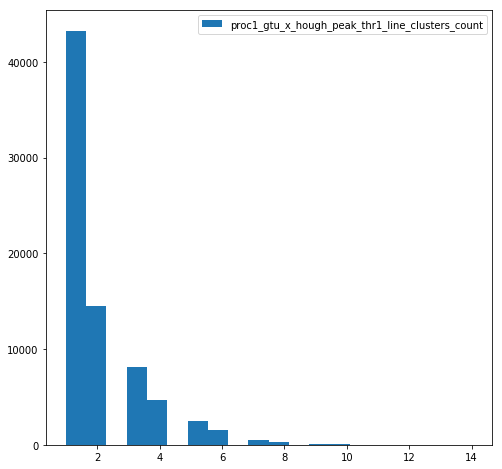

['proc1_gtu_x_hough_peak_thr2_line_clusters_count']


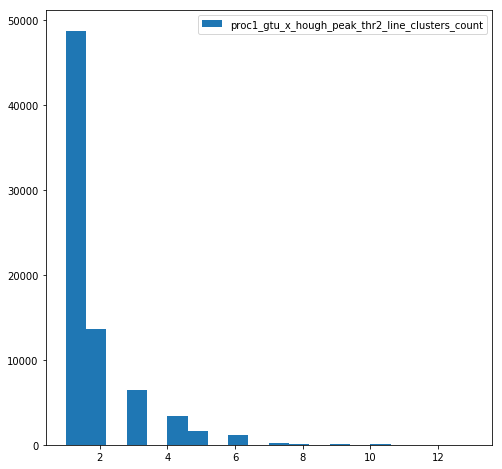

['proc1_gtu_x_hough_peak_thr3_line_clusters_count']


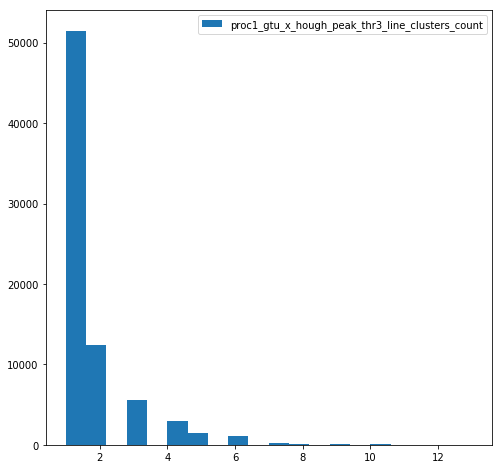

['proc1_gtu_y_hough_peak_thr1_line_clusters_count', 'proc1_gtu_y_hough_peak_thr2_line_clusters_count', 'proc1_gtu_y_hough_peak_thr3_line_clusters_count']


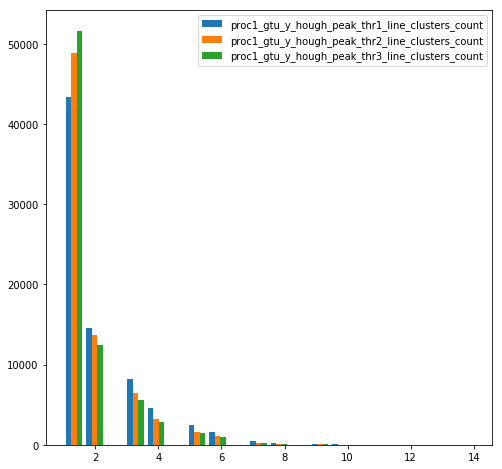

['proc1_gtu_y_hough_peak_thr1_line_clusters_count']


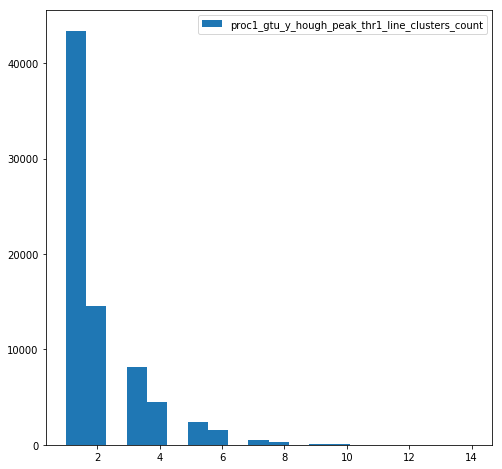

['proc1_gtu_y_hough_peak_thr2_line_clusters_count']


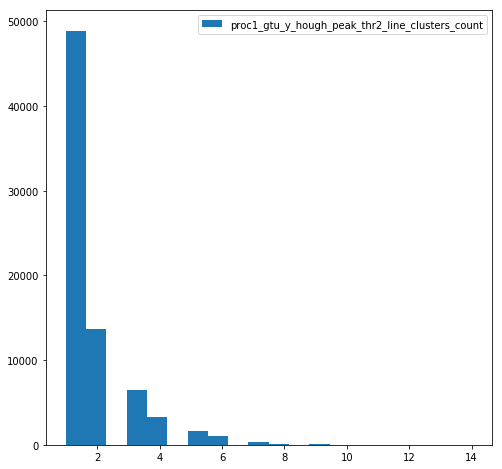

['proc1_gtu_y_hough_peak_thr3_line_clusters_count']


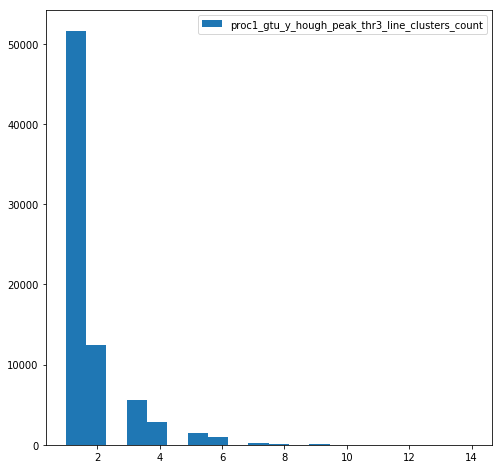

In [ ]:
col_format = 'proc{proci}_{proj_type}_hough_peak_thr{thri}_line_clusters_count'

plt.close('all')

for proj_type in ['x_y','gtu_x', 'gtu_y']:
            
    for proci in [1]:
        cmp_l = []
        for thri in [1,2,3]:
            cmp_l.append(col_format.format(proci=proci, proj_type=proj_type, thri=thri, clu_type=clu_type))

        print(cmp_l)
        fig,ax = plt.subplots(1)
        ax.hist(simu_signals_all_df[cmp_l].values, 20, histtype='bar', label=cmp_l) 
        ax.legend(prop={'size': 10})
        fig.set_size_inches(8,8)
        plt.show()

    for proci in [1]:
        for thri in [1,2,3]:
            cmp_l = []
            cmp_l.append(col_format.format(proci=proci, proj_type=proj_type, thri=thri, clu_type=clu_type))
            
            print(cmp_l)
            fig,ax = plt.subplots(1)
            ax.hist(simu_signals_all_df[cmp_l].values, 20, histtype='bar', label=cmp_l) 
            ax.legend(prop={'size': 10})
            fig.set_size_inches(8,8)
            plt.show()

In [ ]:
# from pandas.plotting import scatter_matrix
# scatter_matrix(simu_signals_all_df[[
#     'proc1_gtu_x_hough_peak_thr2_major_line_phi',
#     'proc1_gtu_y_hough_peak_thr2_major_line_phi',
# #     'proc1_x_y_hough_peak_thr1_line_clusters_max_sum_clu_width',
# #     'proc1_x_y_hough_peak_thr1_line_clusters_max_peak_clu_width',
# #     'proc1_x_y_hough_peak_thr1_line_clusters_count',
# #     'proc1_gtu_x_hough_peak_thr1_line_clusters_max_sum_clu_width',
# #     'proc1_gtu_x_hough_peak_thr1_line_clusters_max_peak_clu_width',
# #     'proc1_gtu_x_hough_peak_thr1_line_clusters_count',
# #     'proc1_gtu_y_hough_peak_thr1_line_clusters_max_sum_clu_width',
# #     'proc1_gtu_y_hough_peak_thr1_line_clusters_max_peak_clu_width',
# #     'proc1_gtu_y_hough_peak_thr1_line_clusters_count',
# #     'proc1_x_y_clusters_count',
# #     'proc1_gtu_y_clusters_count',
# #     'proc1_gtu_x_clusters_count'
# ]], alpha=0.2, figsize=(6, 6), diagonal='kde')

In [ ]:
def add_diff_columns(events_df, events_df_w_diff):
    events_df_w_diff['proc2_gtu_y_gtu_x_hough_peak_thr3_major_line_phi_diff'] = events_df.apply(
        lambda x: smaller_angle_difference(x['proc2_gtu_x_hough_peak_thr3_major_line_phi'],
                                           x['proc2_gtu_y_hough_peak_thr3_major_line_phi']), axis=1)